### Status note:

Trials object doesnt work
LinearClassifier inout task has to be redefined

In [1]:
print('Hi')

Hi


# Experiment

### Imports

In [7]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multisensory_playbook import detection_params_search_test, DetectionTask_versatile, DetectionTask
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas as pd
from multiprocess import Pool 
import warnings
import json

# Ignore all warningsM
warnings.filterwarnings("ignore")

from Helpers import plot_trial_data
import multiprocessing as mp
import random
#mp.set_start_method('fork')

import time
import os
import psutil
import numpy as np
"""
import mkl

threadcount = 20
mkl.set_dynamic(False)
mkl.set_num_threads(threadcount)
print("MKL Max Threads:", mkl.get_max_threads())
"""

'\nimport mkl\n\nthreadcount = 20\nmkl.set_dynamic(False)\nmkl.set_num_threads(threadcount)\nprint("MKL Max Threads:", mkl.get_max_threads())\n'

### Hyperparameters

In [2]:
p_ranges = {
    #"pm": (0.0, 1.0),  # p of motion
    "pe": (0.0, 0.1),  # p of emitting given there is motion
    "pc": (0.0, 1.0),  # p correct direction when emitting
    "pn": (0.0, 1.0),  # p not neutral when not emitting
    "pi": (0.0, 0.5),  # p incorrect when emitting
}
p_labels = ["$p_m$", "$p_e$", "$p_c$", "$p_n$", "$p_i$"]

nb_trials = 40000#40000#00# original: 10000
nb_steps_etrans = 600#90 # original: 90
nb_steps_DT = 100
nb_steps = 90
search_size = 500#00 # original: 10000
# probability of transitioning from e_current to e_next
trans_prob = None
base_seed = np.random.randint(1000)

k = 3
time_dep = 1

### Analysis

In [3]:
# Modified args_versatile with unique but reproducible random seeds
modified_args_versatile = []
for i in range(search_size):
    # Generate a unique but reproducible seed for each tuple based on the base seed and index
    unique_seed = base_seed + (i * 200)
    modified_args_versatile.append((p_ranges, nb_trials, nb_steps, unique_seed, 'DetectionTask_versatile', trans_prob, time_dep, k))

In [4]:
num_processes = 59

#### DT_versatile

In [ ]:
%%time 
# 32min for 10k trials, 500 search size
# Run paralellised search
with Pool(num_processes) as pool:
    accs_v, params_v = zip(*(pool.starmap(detection_params_search_test, modified_args_versatile)))
    print('DT complete')


Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generatedTrain-Test generated

Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generatedTrain-Test generated

Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generatedTrain-Test generated

Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generatedTrain-Test generated

Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generated
Train-Test generatedTrain-Test generated

Train-Test generated
Train-Test ge

In [ ]:
accs_v

#### Etrans

In [ ]:
%%time
# Run paralellised search
with Pool(num_processes) as pool:
    # tr_A, te_A, tr_M, te_M  =
    accs_etrans, params_etrans = zip(*(pool.starmap(detection_params_search_test, modified_args))) 
    print('Etrans complete')

#### DT

In [ ]:
%%time
# Run paralellised search
with Pool(num_processes) as pool:

    accs_DT, params_DT = zip(*(pool.starmap(detection_params_search_test, modified_args_DT)))
      
    #tr_A, te_A, tr_M, te_M 
    #print(os.getpid())
    print('DT complete')


In [ ]:
unique_rowsDT = np.unique(params_DT, axis=0)
print(len(unique_rowsDT))

In [ ]:
unique_rowsDT = np.unique(params_DT, axis=0)
print(len(unique_rowsDT))

In [ ]:
accs_etrans

### Save

In [24]:
def savedata(data, nb_trials, search_size, nb_steps, name):
    np.save(f'./{name}_p_{nb_trials}trls{search_size}smpls_{nb_steps}steps.npy', data)

def loaddata(nb_trials, search_size, nb_steps, name, loc = './'):
    data = np.load(loc + f'{name}_p_{nb_trials}trls{search_size}smpls_{nb_steps}steps.npy')
    return data

In [25]:
savedata(accs_v, nb_trials, search_size, nb_steps,'accs_v')
savedata(params_v, nb_trials, search_size, nb_steps, 'params_v')

In [ ]:
accs_DT

In [ ]:
for i in range(100):
    for j in range(10):
        print(np.unique(te_A[i][j] == tr_A[i][j]))

In [8]:
savedata(accs_DT, num_processes, threadcount, nb_trials, search_size, nb_steps_etrans, 'accs_DT_0.2sparse_0.1p01_0.51p11')
savedata(params_DT, num_processes, threadcount, nb_trials, search_size, nb_steps_etrans, 'params_DT_0.2sparse_0.1p01_0.51p11')

In [ ]:
"""
%%time
# Run paralellised search
with Pool(num_processes) as pool:

    accs_numba, params_numba = zip(*(pool.starmap(detection_params_search_test, args_numba)))
    print('numba complete')
print(len(np.unique(accs_numba, axis=0)))
print(len(np.unique(params_numba, axis=0)))  
"""


In [ ]:
nb_steps

In [ ]:
# Single runs
#for i in range(1, 10):
train, test = detection_params_search_test(p_ranges, nb_trials, nb_steps+500, 'DetectionTask_Etrans_test', (trans_prob, ), random_seed==random_seed)
    #print(i)

In [ ]:
# Parallelised test search
from multisensory_playbook import detection_params_search_test
args_test = args# [(p_ranges, nb_trials, nb_steps, 'DetectionTask_Etrans_test', (trans_prob, ), random_seed==random_seed)] * search_size
with Pool(8) as pool:
    accs_test, params_test = zip(*(pool.starmap(detection_params_search_test, args_test)))

### Markov chain burn-in

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def trace_plot(chain, title='Trace Plot'):
    plt.figure(figsize=(10, 4))
    plt.plot(chain)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('State')
    plt.show()


def autocorrelation(chain, lag=10):
    if len(chain) < 2:
        return []
    
    def compute_autocorr(lag):
        chain_mean = np.mean(chain)
        n = len(chain)
        num = np.sum((chain[:n-lag] - chain_mean) * (chain[lag:] - chain_mean))
        den = np.sum((chain - chain_mean) ** 2)
        return num / den

    acf = [compute_autocorr(l) for l in range(lag + 1)]
    return acf


def gelman_rubin_test(chains):
    num_chains = len(chains)
    num_iterations = len(chains[0])

    # Calculate within-chain variance
    W = np.mean([np.var(chain, ddof=1) for chain in chains])

    # Calculate between-chain variance
    chain_means = np.mean(chains, axis=1)
    B = num_iterations * np.var(chain_means, ddof=1)

    # Estimate of marginal posterior variance
    var_hat = (num_iterations - 1) / num_iterations * W + 1 / num_iterations * B

    # Potential scale reduction factor
    R_hat = np.sqrt(var_hat / W)
    return R_hat

"""
# Example usage
chain = np.random.randn(1000)  # Replace with your Markov chain
multiple_chains = [np.random.randn(1000) for _ in range(4)]  # Replace with multiple Markov chains

trace_plot(chain, 'Trace Plot for Markov Chain')
autocorrelation_test(chain)
r_hat = gelman_rubin_test(multiple_chains)
print(f'Gelman-Rubin Diagnostic (R_hat): {r_hat:.2f}')

# Stationary Distribution Comparison (if applicable)
# Compare empirical distribution with theoretical distribution
"""

In [ ]:
rlim = -1 #600
chain = te_A[0][0]#train.A[0]
"""
for ii in np.arange(1, rlim, 50):
    plt.plot(range(len(autocorrelation(chain[:rlim], lag=ii))), autocorrelation(chain[:rlim], lag=ii))
    plt.title(str(ii))
    plt.show()
"""
def autocorr(chain, rlim=-1):
    plt.plot(range(len(autocorrelation(chain[:rlim], lag=20))), autocorrelation(chain[:rlim], lag=20))
    plt.ylim(top=0.1)
    plt.ylim(bottom=-0.1)
    
autocorr(tr_A[0][0])
autocorr(te_A[0][0])

In [ ]:
len(tr_A[0][0])

In [ ]:
rlim = 100
train = tr_A[0]
chain = train[0] #train.A[5]
autocorr_values = autocorrelation(chain[:rlim], lag=10)

# Check if autocorrelation drops below a certain threshold, e.g., 0.1
is_equilibrium = all(abs(ac) < 0.2 for ac in autocorr_values[1:])  # Ignoring lag 0

if is_equilibrium:
    print("The Markov chain appears to have reached equilibrium.")
else:
    print("The Markov chain may not have reached equilibrium yet.")


In [ ]:
import numpy as np

def autocorrelation_single(chain, lag=10):
    if len(chain) < 2:
        return []
    
    def compute_autocorr(lag):
        chain_mean = np.mean(chain)
        n = len(chain)
        num = np.sum((chain[:n-lag] - chain_mean) * (chain[lag:] - chain_mean))
        den = np.sum((chain - chain_mean) ** 2)
        return num / den if den != 0 else 0

    acf = [compute_autocorr(l) for l in range(1, lag + 1)]  # Exclude lag 0
    return acf



In [ ]:
te_A[1][0]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for steps in [100, 500, 1000]:
    steprlim = steps
    rlim = 100
    chain = te_A[0]#train.A
    # Assuming 'train' is your (1000, 1100) dataset
    num_trials, chain_length = chain[:rlim, :steprlim].shape
    lag = 30  # You can adjust this based on your requirement
    
    # Calculate autocorrelation for each trial
    autocorr_matrix = np.array([autocorrelation_single(chain[:rlim, :steprlim][i], lag) for i in range(num_trials)])
    """
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Heatmap of autocorrelations
    plt.subplot(2, 1, 1)
    sns.heatmap(autocorr_matrix, cmap='viridis', cbar_kws={'label': 'Autocorrelation'})
    plt.title('Autocorrelation for Each Trial at Different Lags')
    plt.xlabel('Lag')
    plt.ylabel('Trial')
    """
    # Average autocorrelation plot
    plt.subplot(2, 1, 2)
    average_acf = np.mean(autocorr_matrix, axis=0)
    plt.plot(range(1, lag + 1), average_acf, label = str(steps)+' steps')
    plt.title('Average Autocorrelation Across Trials')
    plt.xlabel('Lag')
    plt.ylabel('Average Autocorrelation')
    
    plt.tight_layout()
plt.legend()
#    plt.show()

In [ ]:
# Determine if each trial has reached equilibrium
threshold = 0.1
equilibrium_reached = np.all(np.abs(autocorr_matrix) < threshold, axis=1)
num_equilibrium = np.sum(equilibrium_reached)

# Print summary of equilibrium analysis
print(f"Number of trials that reached equilibrium: {num_equilibrium} out of {num_trials}")
for i, reached in enumerate(equilibrium_reached):
    if reached:
        print(f"Trial {i + 1} reached equilibrium.")

### Visualisation

In [4]:
import matplotlib as mpl

# Set global parameters
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'red'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18

plt.rcParams['ytick.labelsize'] = 18

In [5]:
def compare_acc(accs, params, tasktype='Detection Task', loc="C:\\Users\\swath\\SNN_fork\\Plots_new\\", suffix=None, do_save=1):
    accs = 100 * np.array(accs)  # search size x pairs
    #print(type(accs))
    #accs = accs[:][:1]
    #accs = tuple([100 * element for element in sublist] for sublist in accs)

    params = np.array(params)  # search size x parameters in p_ranges
    params = params[np.sum(accs, axis=1) != 0.0, :]  # filter out values
    accs = accs[np.sum(accs, axis=1) != 0.0, :]  # filter out values
    #accs_diff = accs[:, 1] - accs[:, 0]  # results, (FtA - AtF)
    #print(len(accs_diff))
    fig, ax = plt.subplots(
    1, len(p_ranges.keys()), figsize=(25, 5), sharex=True, sharey=True
)
    fig.suptitle(f"{tasktype}", fontsize=16)


    for a, param in enumerate(p_ranges.keys()):
        plt.sca(ax[a])
        plt.scatter(
            accs[:, 0], accs[:, 1], c=params[:, a], cmap="plasma", marker=".", alpha=0.75
        )
        plt.plot([30, 100], [30, 100], "k", alpha=0.25)
        #plt.title(p_labels[a])

        if a == 0:
            plt.xlabel("AtF Accuracy")
            plt.ylabel("FtA Accuracy")
    fig, ax = plt.subplots(
    1, len(p_ranges.keys()), figsize=(25, 5), sharex=True, sharey=True
)
    for a, param in enumerate(p_ranges.keys()):
        plt.sca(ax[a])
        plt.scatter(
            accs[:, 0], accs[:, 2], c=params[:, a], cmap="plasma", marker=".", alpha=0.75
        )
        plt.plot([30, 100], [30, 100], "k", alpha=0.25)
        #plt.title(p_labels[a])

        if a == 0:
            plt.xlabel("AtF Accuracy")
            plt.ylabel("FtAt Accuracy")
            
    fig, ax = plt.subplots(
    1, len(p_ranges.keys()), figsize=(25, 5), sharex=True, sharey=True
)
    for a, param in enumerate(p_ranges.keys()):
        plt.sca(ax[a])
        plt.scatter(
            accs[:, 1], accs[:, 2], c=params[:, a], cmap="plasma", marker=".", alpha=0.75
        )
        plt.plot([30, 100], [30, 100], "k", alpha=0.25)
        #plt.title(p_labels[a])

        if a == 0:
            plt.xlabel("FtA Accuracy")
            plt.ylabel("FtAt Accuracy")
            
        if do_save:
            plt.savefig(loc + f'{tasktype}_{suffix}.png')

Min diff: -2.4
Max diff: 8.0
Median diff: 0.5
Number of samples: 37


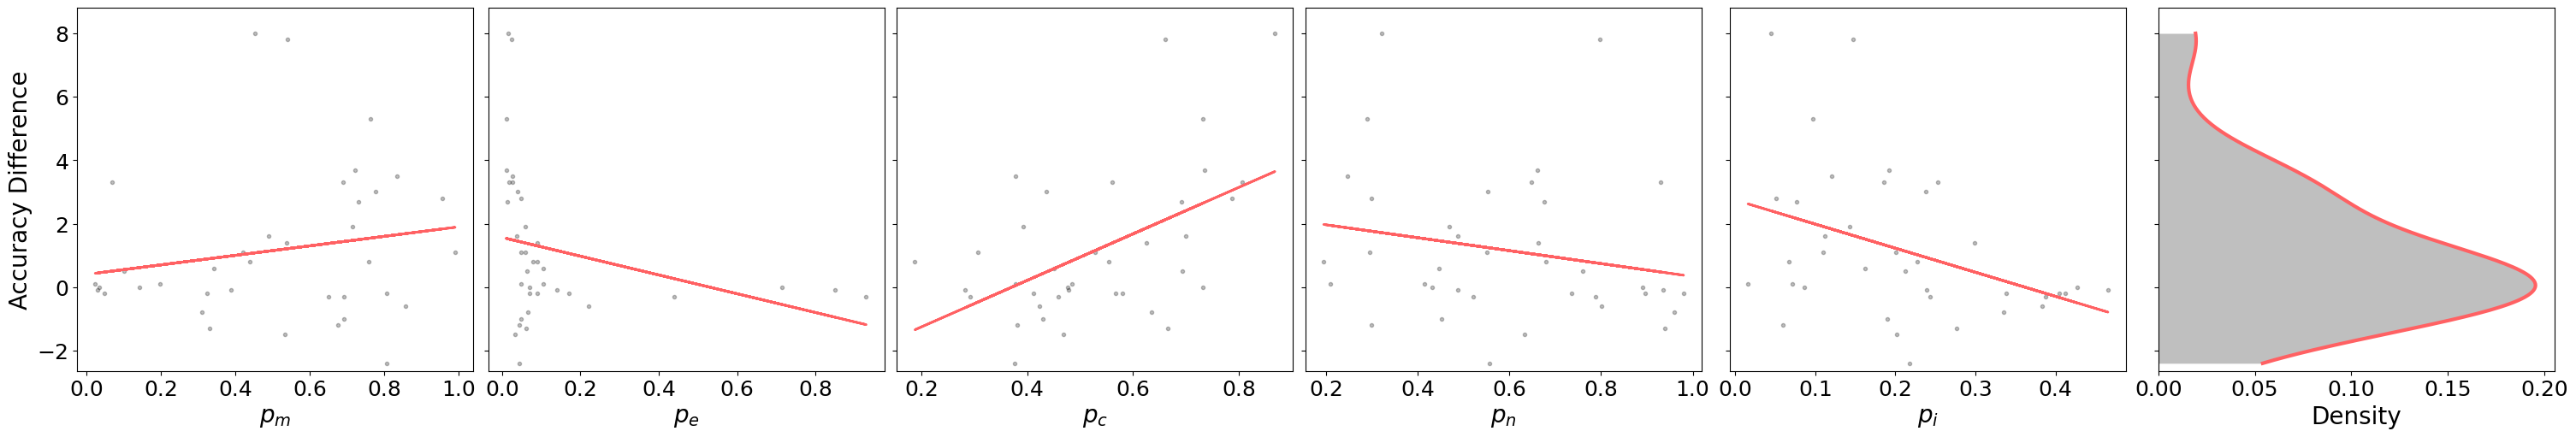

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

def kdeplot(accs, params, p_ranges, p_labels, algorithm_pair=(0, 1), printstats=1):
    accs = 100 * np.array(accs)  # convert to percentage
    params = np.array(params)

    # filter out rows where the sum of accs for selected algorithms is zero
    accs_sum = np.sum(accs[:, algorithm_pair], axis=1)
    params = params[accs_sum != 0.0, :]
    accs = accs[accs_sum != 0.0, :]

    # Calculate difference between the selected algorithms
    accs_diff = accs[:, algorithm_pair[1]] - accs[:, algorithm_pair[0]]

    # Plotting setup
    fig, ax = plt.subplots(
        1,
        len(p_ranges.keys()) + 1,
        figsize=(30, 5),
        sharex=False,
        sharey=True,
        constrained_layout=True,
    )
    
    # Scatter plot and linear regression for each parameter
    for a, param in enumerate(p_ranges.keys()):
        plt.sca(ax[a])
        plt.scatter(params[:, a], accs_diff, color="k", marker=".", alpha=0.25)
        model = LinearRegression().fit(params[:, a][:, None], accs_diff)
        plt.plot(
            params[:, a],
            model.predict(params[:, a][:, None]),
            color="xkcd:coral pink",
            alpha=1.0,
        )
        plt.xlabel(p_labels[a])
    
        if a == 0:
            plt.ylabel("Accuracy Difference")

        plt.ylim([accs_diff.min() * 1.1, accs_diff.max() * 1.1])
    
    # KDE plot
    plt.sca(ax[-1])
    sns.kdeplot(y=accs_diff, cut=0, color="k", fill=True, alpha=0.25, linewidth=0.0)
    sns.kdeplot(y=accs_diff, cut=0, color="xkcd:coral pink", fill=False, linewidth=3.0)
    
    if printstats:
        # Print statistics
        print("Min diff: " + str(np.round(accs_diff.min(), 2)))
        print("Max diff: " + str(np.round(accs_diff.max(), 2)))
        print("Median diff: " + str(np.round(np.median(accs_diff), 2)))
        print("Number of samples: " + str(len(accs_diff)))

    return accs_diff, params

# p = 0 # printstats
# kdeplot(accs, params, p_ranges, p_labels, algorithm_pair=(0, 1), printstats=p)
# kdeplot(accs, params, p_ranges, p_labels, algorithm_pair=(0, 2), printstats=p)
# kdeplot(accs, params, p_ranges, p_labels, algorithm_pair=(1, 2), printstats=p)

# # DT
# kdeplot(accs_DT, params_DT, p_ranges, p_labels, algorithm_pair=(0, 1), printstats=p)
# kdeplot(accs_DT, params_DT, p_ranges, p_labels, algorithm_pair=(0, 2), printstats=p)
# kdeplot(accs_DT, params_DT, p_ranges, p_labels, algorithm_pair=(1, 2), printstats=p)
p = 1

#diff_etrans, params_etrans_postkde = kdeplot(accs_etrans, params_etrans, p_ranges, p_labels, algorithm_pair=(1, 2), printstats=p)
#diff_numba, params_numba = kdeplot(accs_numba, params_numba, p_ranges, p_labels, algorithm_pair=(0, 1), printstats=p)

diff_v, params_v_postkde = kdeplot(accs_v, params_v, p_ranges, p_labels, algorithm_pair=(1, 2), printstats=p)

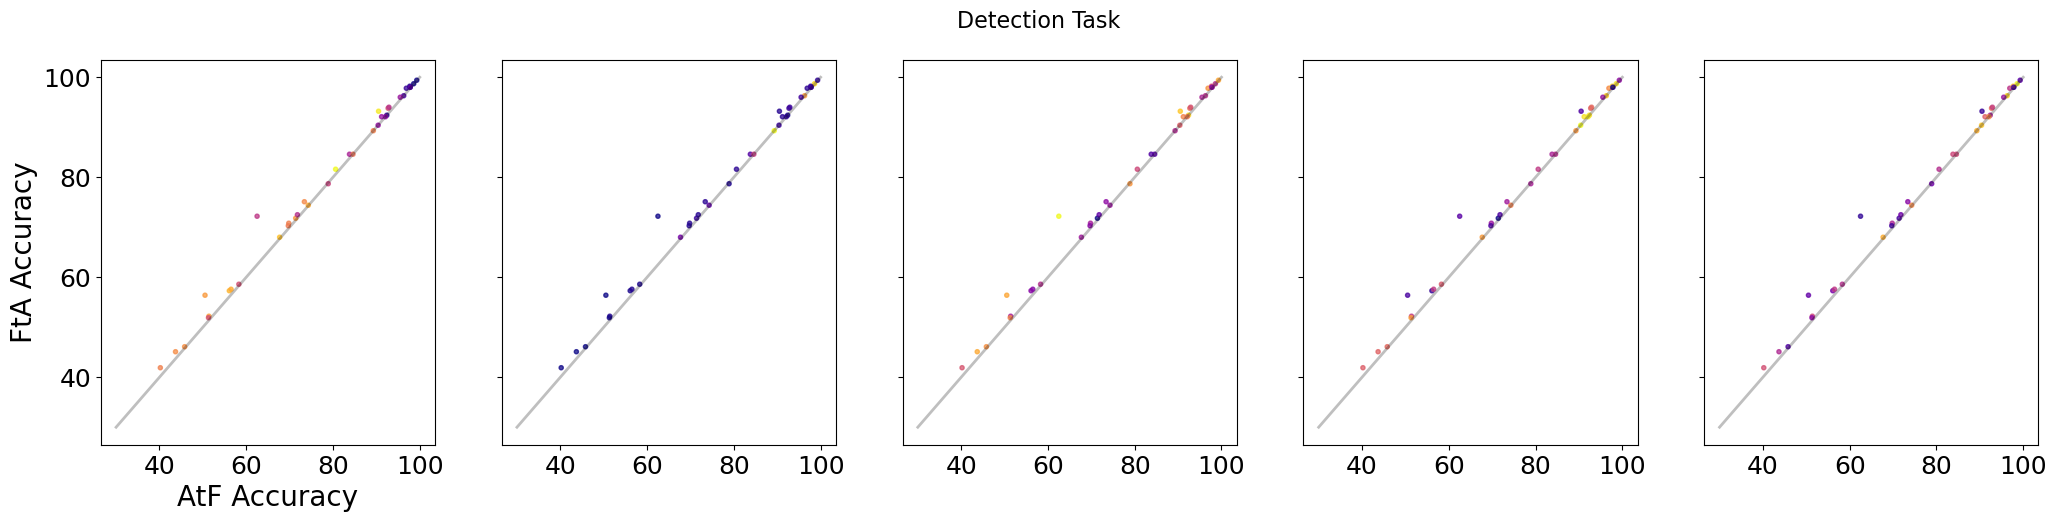

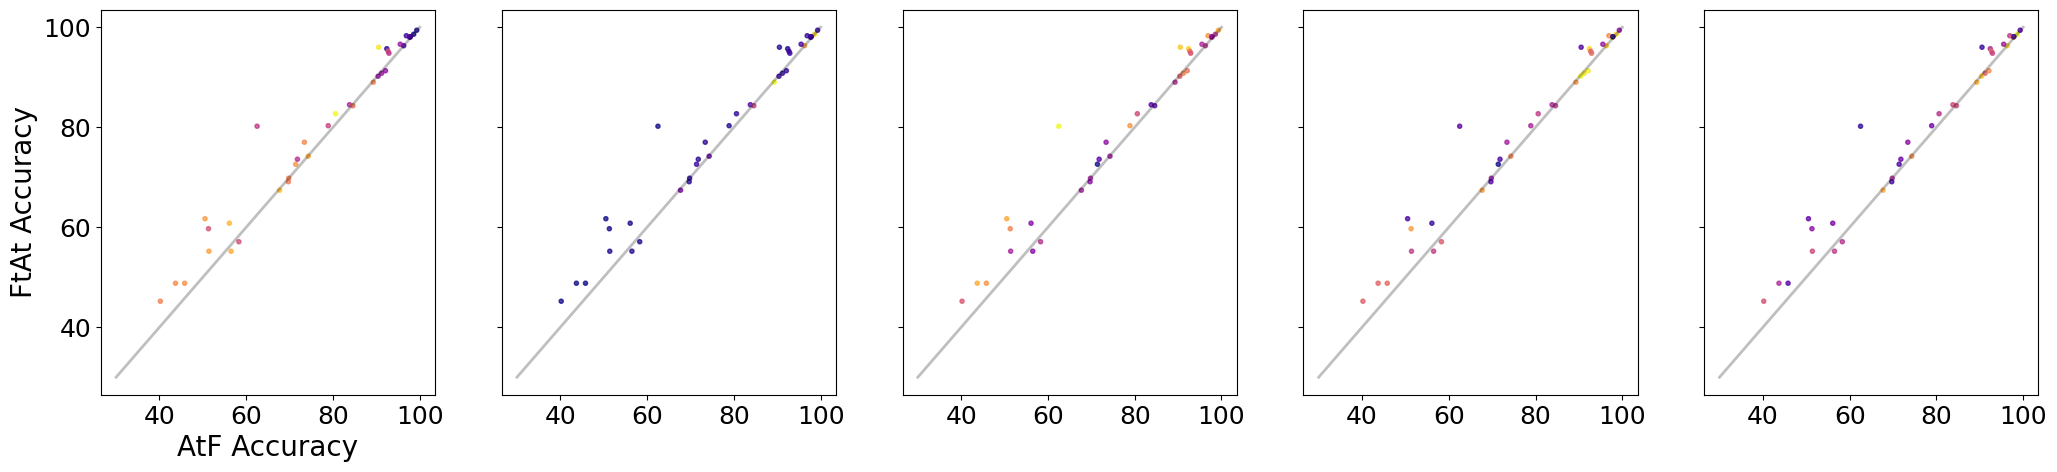

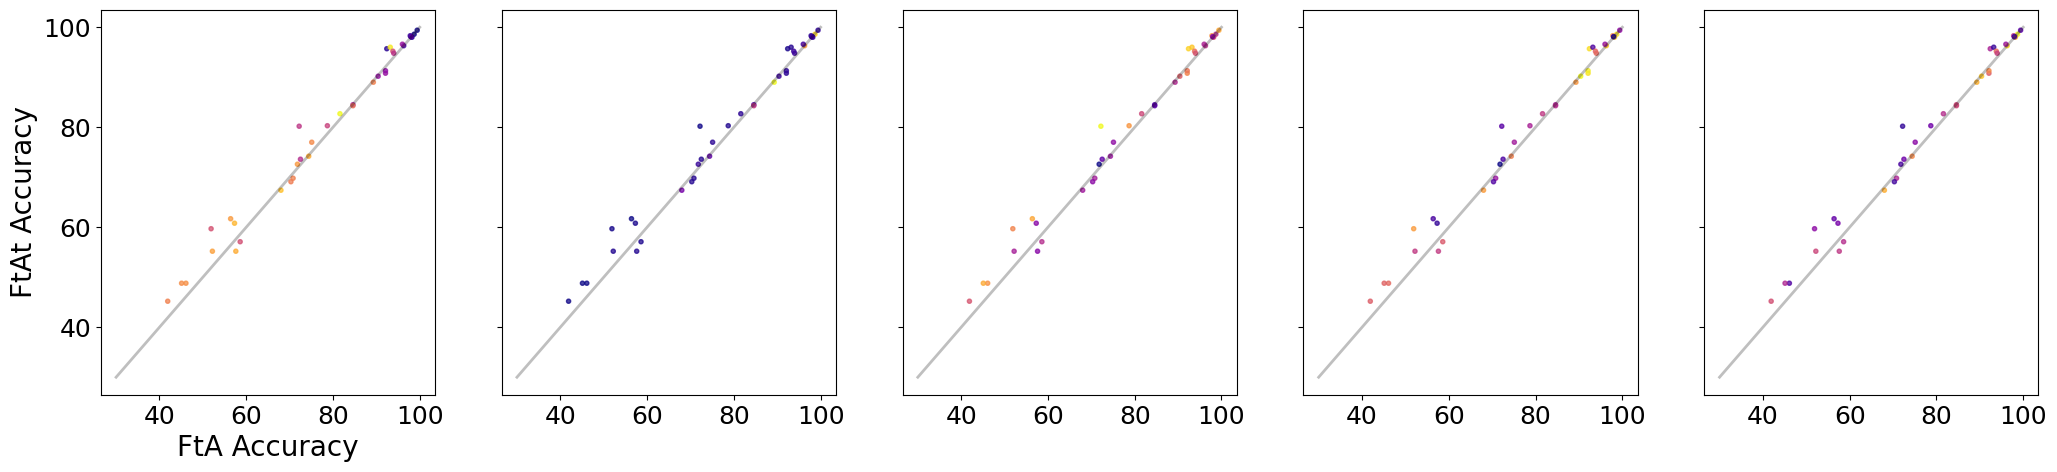

In [10]:
compare_acc(accs_v, params_v, suffix = 'neutral', do_save=0)


In [ ]:
#unique_rows = np.unique(params_etrans, axis=0)
unique_rowsDT = np.unique(params_DT, axis=0)

In [ ]:
print(len(unique_rowsDT))

In [ ]:
# Less unique = less diverse = possible parallelisation error
#print(f"% Unique acc differences in Etrans: {len(np.unique(diff_etrans)) / len(diff_etrans)*100}")
#print(f"% Unique acc differences in numba: {len(np.unique(diff_numba)) / len(diff_numba)*100}")
print(f"% Unique acc differences in DT: {len(np.unique(diff_DT)) / len(diff_DT)*100}")
print(" ")


In [ ]:
len(params_etrans[0])

In [ ]:
print(f"% Unique params sets in Etrans after filtering in kde: {len(np.unique(params_etrans_postkde[:,0])) / len(params_etrans_postkde[:,0])*100}")
#print(f"% Unique params sets in numba: {len(np.unique(params_numba[:,0])) / len(params_numba[:,0])*100}")
print(f"% Unique params sets in DT after filtering in kde: {len(np.unique(params_DT_postkde[:,0])) / len(params_DT_postkde[:,0])*100}")

Pool = 8, threads = 24
% Unique acc differences in Etrans: 14.880952380952381
% Unique acc differences in DT: 40.20618556701031
 
% Unique params sets in Etrans: 25.595238095238095
% Unique params sets in DT: 53.09278350515464

Pool = 1, threads = 24
% Unique acc differences in Etrans: 35.13513513513514
% Unique acc differences in DT: 34.01015228426396
 
% Unique params sets in Etrans: 100.0
% Unique params sets in DT: 100.0

In [ ]:
ylim = 20
plt.hist(diff_etrans,bins=60);
plt.ylim(top=ylim)
plt.show()
plt.hist(diff_DT,bins=60, alpha= 0.25);
plt.ylim(top=ylim)
plt.show()
#plt.hist(diff_numba,bins=60);
#plt.ylim(top=900)
#plt.show()

In [ ]:
len(params_DT_postkde[:,0])

In [ ]:
plt.scatter(params_etrans_postkde[:100,0], diff_etrans[:100],color="k", marker="x", alpha=0.2)
plt.scatter(params_etrans_postkde[100:200,0], diff_etrans[100:200],color="r", marker=".", alpha=0.1)
plt.scatter(params_etrans_postkde[200:300,0], diff_etrans[200:300],color="b", marker="o", alpha=0.07)

plt.scatter(params_etrans_postkde[300:400,0], diff_etrans[300:400],color="y", marker="o", alpha=0.05)

In [ ]:
plt.scatter(params_DT_postkde[:100,0], diff_DT[:100],color="k", marker="x", alpha=0.2)
plt.scatter(params_DT_postkde[100:200,0], diff_DT[100:200],color="r", marker=".", alpha=0.1)
plt.scatter(params_DT_postkde[200:300,0], diff_DT[200:300],color="b", marker="o", alpha=0.07)

plt.scatter(params_DT_postkde[300:400,0], diff_DT[300:400],color="y", marker="o", alpha=0.05)

In [ ]:
plt.scatter(params_etrans_postkde[:,0], diff_etrans,color="k", marker=".", alpha=0.05)
plt.show()
plt.scatter(params_DT_postkde[:,0], diff_DT,color="k", marker=".", alpha=0.05)
plt.show()
#plt.scatter(params_numba[:,0], diff_numba,color="k", marker=".", alpha=0.05)

In [ ]:
accs_etrans_pc = 100 * np.array(accs_etrans)
plt.scatter(accs_etrans_pc[:,0], accs_etrans_pc[:,1])
plt.scatter(accs_etrans_pc[:,0], accs_etrans_pc[:,2], color = 'orange')
plt.scatter(accs_etrans_pc[:,1], accs_etrans_pc[:,2], color = 'salmon')
plt.plot([30, 100], [30, 100], "k", alpha=0.25)

In [ ]:
plt.plot(accs_DT_pc[:,0], accs_DT_pc[:,1])
plt.plot(accs_DT_pc[:,0], accs_DT_pc[:,2])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  accs is array of accuracies with shape (1000, 3)
def inspectaccs(accs):
    
    # Basic Statistics
    for i in range(accs.shape[1]):
        print(f"Algorithm {i+1}:")
        print(f" Mean: {np.mean(accs[:, i]):.2f}")
        print(f" Median: {np.median(accs[:, i]):.2f}")
        print(f" Std Dev: {np.std(accs[:, i]):.2f}")
        print(f" Min: {np.min(accs[:, i]):.2f}")
        print(f" Max: {np.max(accs[:, i]):.2f}\n")
    
    # Histograms
    plt.figure(figsize=(12, 4))
    for i in range(accs.shape[1]):
        plt.subplot(1, 3, i+1)
        plt.hist(accs[:, i], bins=10, alpha=0.7)
        plt.title(f"Algorithm {i+1} Accuracies")
        plt.ylim(top=1000)
    plt.tight_layout()
   # plt.show()
    """
    # Boxplots
    plt.figure(figsize=(6, 4))
    plt.boxplot([accs[:, i] for i in range(accs.shape[1])], labels=[f"Algorithm {i+1}" for i in range(accs.shape[1])])
    plt.title("Accuracy Distribution per Algorithm")
    plt.ylabel("Accuracy")
    plt.show()
    
    # Density Plots
    plt.figure(figsize=(12, 4))
    for i in range(accs.shape[1]):
        plt.subplot(1, 3, i+1)
        sns.kdeplot(accs[:, i], shade=True)
        plt.title(f"Density Plot: Algorithm {i+1}")
        plt.ylim(top=3.5)
    plt.tight_layout()
    plt.show()
    """
    
inspectaccs(accs_etrans)
#inspectaccs(accs_numba)
inspectaccs(accs_DT)

#### Plot

In [6]:
# Loading the data from each file
accs_DT = loaddata(num_processes, threadcount, nb_trials, search_size, nb_steps_DT, name='accs_DT')
params_DT = loaddata(num_processes, threadcount, nb_trials, search_size, nb_steps_DT, name='params_DT')
accs_etrans = loaddata(num_processes, threadcount, nb_trials, search_size, nb_steps_etrans, name='accs_etrans')
params_etrans = loaddata(num_processes, threadcount, nb_trials, search_size, nb_steps_etrans, name='params_etrans')

NameError: name 'loaddata' is not defined

In [ ]:
print(np.unique(accs_etrans).size)
print(np.unique(accs_DT).size)

In [ ]:
#compare_acc(accs_etrans, params_etrans, tasktype='Time-dependent Detection Task', suffix = 'neutral', do_save=0)
compare_acc(accs_DT, params_DT, suffix = 'neutral', do_save=0)


In [ ]:
nb_trials

In [ ]:
print(len(accs_etrans))
print(len(params_etrans))
print(len(np.where(np.sum(params_etrans, axis=1) == 0)[0]))
print(len(diff_etrans))

In [ ]:
accs_DT

In [ ]:
accs1 = 100 * np.array(accs_DT)  # search size x pairs

accs2 = accs1[np.sum(accs1, axis=1) != 0.0, :]  # filter out values

accse1 = 100 * np.array(accs_etrans)  # search size x pairs

accse2 = accse1[np.sum(accse1, axis=1) != 0.0, :]  # filter out values



In [ ]:
print(accs1.shape, accs2.shape)
print(accse1.shape, accse2.shape)

In [ ]:
accs2[:,1] == accs2[:,2] 

In [ ]:
plt.scatter(accs2[:, 1], accs2[:, 2])

In [ ]:
accs_etrans_postcompare[:, 0] == accs_etrans_postcompare[:, 1]
#accs_DT_postcompare[:, 0] == accs_DT_postcompare[:, 1]

In [ ]:
i = 0
ii = 0
jj = 0
for a in accs_etrans:
    if a[0] != a[1]:
        i+=1
    if a == [0,0]:
        #print(a)
        ii += 1
print(i/len(accs_etrans))
print(ii/len(accs_etrans))

j = 0
for a in accs_DT:
    if a[0] != a[1]:
        j+=1
    if a == [0,0]:
        jj += 1
print(j/len(accs_DT))
print(jj/len(accs_DT))

# Filing

In [ ]:
import csv

# Open a file in write mode
with open('accs_example.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the tuple as a row in the CSV file
    writer.writerow(accs)
# Open a file in write mode
with open('params_example.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the tuple as a row in the CSV file
    writer.writerow(params)
import csv
import ast

# Function to safely evaluate an element
def safe_eval(element):
    try:
        return ast.literal_eval(element)  # Safely evaluate the element
    except (ValueError, SyntaxError):
        return element  # Return the element as is if it's not a list representation

# Function to read a CSV file and return the data as a tuple
def read_csv_as_tuple(file_name):
    with open(file_name, 'r', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            # Convert string representations of lists back into actual lists
            return tuple(safe_eval(item) for item in row)

# Read the data from the CSV files
accs = read_csv_as_tuple('accs_example.csv')



# Print the tuples to verify the content
print("Accs Tuple:", accs)
#print("Params Tuple:", params_tuple)

import csv

# Function to convert a string representing a numeric array to an actual list of floats
def convert_to_float_list(element):
    try:
        # Remove brackets and split the string by spaces
        items = element.strip('[]').split()
        # Convert each item to float and return as a list
        return [float(item) for item in items]
    except ValueError:
        # Return the element as is if conversion is not possible
        return element

# Function to read a CSV file and return the data as a tuple
def read_csv_as_tuple(file_name):
    with open(file_name, 'r', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            # Convert string representations of numeric arrays into actual lists of floats
            return tuple(convert_to_float_list(item) for item in row)

# Read the data from the CSV files
#accs_tuple = read_csv_as_tuple('accs_example.csv')
params = read_csv_as_tuple('params_example.csv')

# Print the tuples to verify the content
print("Accs Tuple:", accs)
print("Params Tuple:", params)



In [ ]:
# Find figure files using metadata
def find_figure_files(search_criteria, metadata_dir):
    """
    Find figure files whose metadata matches all the key-value pairs in search_criteria.

    :param search_criteria: Dictionary of metadata key-value pairs to search for.
    :param metadata_dir: Directory containing metadata files.
    :return: List of figure filenames that match the search criteria.
    """
    matched_files = []
    for filename in os.listdir(metadata_dir):
        if filename.endswith("_metadata.json"):
            try:
                with open(os.path.join(metadata_dir, filename), 'r') as file:
                    metadata = json.load(file)
                    # Check if all key-value pairs in search_criteria match
                    if all(metadata.get(key) == value for key, value in search_criteria.items()):
                        figure_filename = filename.replace("_metadata.json", ".pdf")
                        matched_files.append(figure_filename)
            except json.JSONDecodeError as e:
                print(f"Error reading {filename}: {e}")
    return matched_files


# Usage
metadata_directory = './'
search_criteria = {"tasktype": "Time-dependent Detection Task", 'nb_steps': nb_steps}

matched_figures = find_figure_files(search_criteria, metadata_dir=metadata_directory)
print("Matched Figure Files:", matched_figures)


# Testing

### Test Detection Task, Etrans and Etrans numba functions in neutral state

In [ ]:
# Parameters for initialization
pm = 1.
pe = 1.
pn = 0.
pc = 0.
pi = 1
nb_steps = 100
nb_repeats = 100
random_seed = 4

# Initialize tasks
numbatask = DetectionTask_Etrans_numba(pm, pe, pn, pc, pi, nb_steps, nb_repeats, random_seed=random_seed)
etrans = DetectionTask_Etrans_test(pm, pe, pn, pc, pi, nb_steps, nb_repeats, random_seed=random_seed)
DT = DetectionTask(pm, pe, pn, pc, pi)

# Generate trials with both implementations
nb_trials=nb_repeats
numbatask_M = np.zeros(nb_trials, dtype=int)
numbatask_A = np.zeros((nb_trials, nb_steps), dtype=int)
numbatask_V = np.zeros((nb_trials, nb_steps), dtype=int)
numbatask_M, numbatask_A, numbatask_V = numbatask.generate_trials()


etrans_M = np.zeros(nb_trials, dtype=int)
etrans_A = np.zeros((nb_trials, nb_steps), dtype=int)
etrans_V = np.zeros((nb_trials, nb_steps), dtype=int)
t = etrans.generate_trials
etrans_M, etrans_A, etrans_V = t.M, t.A, t.V

DT_M = np.zeros(nb_trials, dtype=int)
DT_A = np.zeros((nb_trials, nb_steps), dtype=int)
DT_V = np.zeros((nb_trials, nb_steps), dtype=int)
DTt = DT.generate_trials(nb_steps, nb_repeats)
DT_M, DT_A, DT_V = DTt.M, DTt.A, DTt.V

print(np.unique(etrans_M, return_counts = True))
print(np.unique(etrans_A, return_counts = True))
print(np.unique(etrans_V, return_counts = True))

print(np.unique(numbatask_M, return_counts = True))
print(np.unique(numbatask_A, return_counts = True))
print(np.unique(numbatask_V, return_counts = True))

print(np.unique(DT_M, return_counts = True))
print(np.unique(DT_A, return_counts = True))
print(np.unique(DT_V, return_counts = True))

### Test passed!

### Detection Task vs neutral Time-dependent Detection Task

In [ ]:
from Helpers import plot_trial_data
from multisensory_playbook import DetectionTask
from multisensory_playbook import DetectionTask_Etrans_test
import numpy as np
import matplotlib.pyplot as plt
from multisensory_playbook import Trials, DetectionTask_Etrans_test

nb_steps = 100
pm = 0.2 # smaller doesnt mean sparser signals from prey !!!!!!!!
pe = 0.6 # for first value of E
pn = 0.2 # smaller = less noisy (more zeros)
pc = 0.6 #0.3
pi = 0.3 #0.6 
repeats = 1

In [ ]:
task = DetectionTask(pm=pm, pe=pe, pn=pn, pc=pc, pi=pi)
trials =task.generate_trials(time_steps=nb_steps, repeats=repeats)

In [ ]:
trials.counts(pairs=2)#.shape

In [ ]:
print('M: ', trials.M)

print('A')
print('0: ', len(np.where(trials.A == 0)[0]) / len(trials.A))
print('1: ', len(np.where(trials.A == 1)[0]) / len(trials.A))
print('-1: ', len(np.where(trials.A == -1)[0]) / len(trials.A))

print('V')
print('0: ', len(np.where(trials.V == 0)[0]) / len(trials.V))
print('1: ', len(np.where(trials.V == 1)[0]) / len(trials.V))
print('-1: ', len(np.where(trials.V == -1)[0]) / len(trials.V))

In [ ]:
trans_prob = {
    0: [0.5, 0.5],  # Probabilities for transitioning from E=0
    1: [0.5, 0.5],  # Probabilities for transitioning from E=1
}

In [ ]:
etask = DetectionTask_Etrans_test(pm=pm, pe=pe, pn=pn, pc=pc, pi=pi, nb_steps=nb_steps, nb_repeats=repeats, trans_prob=trans_prob)
etrials =etask.generate_trials#(time_steps=nb_steps, repeats=repeats)

In [ ]:
print('M: ', etrials.M)

print('A')
print('0: ', len(np.where(etrials.A == 0)[0]) / len(etrials.A))
print('1: ', len(np.where(etrials.A == 1)[0]) / len(etrials.A))
print('-1: ', len(np.where(etrials.A == -1)[0]) / len(etrials.A))

print('V')
print('0: ', len(np.where(etrials.V == 0)[0]) / len(etrials.V))
print('1: ', len(np.where(etrials.V == 1)[0]) / len(etrials.V))
print('-1: ', len(np.where(etrials.V == -1)[0]) / len(etrials.V))

**Conclusion:** Detection Task work similar to Time dependent Detection task, when the transition prob matrix is neutral
- trans_prob = {
    0: [0.5, 0.5],  # Probabilities for transitioning from E=0
    1: [0.5, 0.5],  # Probabilities for transitioning from E=1
}
- Time dependent Detection Task:
M:  [-1]
A
0:  41.0
1:  25.0
-1:  34.0
V
0:  45.0
1:  16.0
-1:  39.0

- Regular Detection Task
M:  [1]
A
0:  47.0
1:  34.0
-1:  19.0
V
0:  45.0
1:  29.0
-1:  26.0

### Search algorithm setup

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

def objective_function(pm, pe, pn, pc, pi, nb_trials, nb_steps, classifier_type, task_type):
    # Create the detection task with given parameters
    task = task_type(pm=pm, pe=pe, pn=pn, pc=pc, pi=pi)

    # Generate trials
    trials = task.generate_trials(nb_trials, nb_steps)

    # Split trials into training and testing sets (assuming 70-30 split)
    training_size = int(nb_trials * 0.7)
    training_trials = Trials(
        repeats=training_size,
        time_steps=nb_steps,
        M=trials.M[:training_size],
        A=trials.A[:training_size],
        V=trials.V[:training_size],
        task=task
    )
    testing_trials = Trials(
        repeats=nb_trials - training_size,
        time_steps=nb_steps,
        M=trials.M[training_size:],
        A=trials.A[training_size:],
        V=trials.V[training_size:],
        task=task
    )

    # Initialize and train the classifier
    classifier = classifier_type(task)
    trained_classifier = classifier.train(training_trials)

    # Test the classifier and get accuracy
    test_results = trained_classifier.test(testing_trials)
    accuracy = test_results.accuracy

    # Return negative accuracy as we are minimizing
    return -accuracy

# Define parameter space for Bayesian Optimization
param_space = [
    Real(0.01, 0.99, "uniform", name='pm'),
    Real(0.01, 0.99, "uniform", name='pe'),
    Real(0.01, 0.99, "uniform", name='pn'),
    Real(0.01, 0.99, "uniform", name='pc'),
    Real(0.01, 0.99, "uniform", name='pi')
]


In [ ]:
param_space#

In [ ]:

# Bayesian Optimization function
@use_named_args(param_space)
def objective(params):
    pm, pe, pn, pc, pi = params
    return objective_function(pm, pe, pn, pc, pi, nb_trials=100, nb_steps=10, classifier_type=LinearClassifier, task_type=DetectionTask)

# Run Bayesian Optimization
result = gp_minimize(objective, param_space, n_calls=50, random_state=0)

# Extract best parameters and performance
best_parameters = result.x
best_performance = -result.fun

print("Best Parameters:", best_parameters)
print("Best Performance:", best_performance)


### Test random_variables()

In [ ]:
from multisensory_playbook import DetectionTask_Etrans_test
from multisensory_playbook import DetectionTask
trans_prob = {
    0: [0.5, 0.5],  # Probabilities for transitioning from E=0
    1: [0.5, 0.5],  # Probabilities for transitioning from E=1
}

nb_steps = 1000
pm = 0.8 # smaller doesnt mean sparser signals from prey !!!!!!!!
pe = 0.2 # for first value of E
pn = 0.2 # smaller = less noisy (more zeros)
pc = 0.8 #0.3
pi = 0.1 #0.6 
nb_trials = 100# original: 10000
run = 1 # 0 for testing 

p = {
    "nb_steps": nb_steps,
    "pm": pm,
    "pe": pe,
    "pn": pn,
    "pc": pc,
    "pi": pi,
    "nb_repeats": nb_trials,
    "trans_prob": trans_prob,
    "run": run,
    "random_seed": 42,
    
}

p2 = {
 
    "pm": pm,
    "pe": pe,
    "pn": pn,
    "pc": pc,
    "pi": pi}

# Generate trials
testtask = DetectionTask_Etrans_test(**p)
testtrials = testtask.generate_trials#(random_seed=42)

task = DetectionTask(**p2)
trials = task.generate_trials(nb_trials, nb_steps)


In [ ]:
import numpy as np 
np.unique(trials.A, return_counts=True)[1]/trials.A.size

In [ ]:
np.unique(testtrials.A, return_counts=True)[1]/testtrials.A.size

In [ ]:
# Conclusion: time dependent task (neutral) accuracy differences overlap too much across trials